In [ ]:
!pip install gensim
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary
from sklearn.metrics.pairwise import cosine_similarity
import pyLDAvis.gensim
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import drive
import shutil

drive.mount('/content/gdrive')

source_path = '/content/gdrive/MyDrive/dataset_text_mining/pre_processed.csv'

destination_path = '/content/dataset_yelp.csv'

shutil.copyfile(source_path, destination_path)

Mounted at /content/gdrive


'/content/dataset_yelp.csv'

In [ ]:
remove_words = ['never','ever','couldnot','wouldnot','could','would','us',"i'm","you'd", 'like', 'liked', 'likes', 'love', 'loved', 'loving', 'enjoy', 'enjoyed', 'enjoying',
    'admire', 'admired', 'admiring', 'prefer', 'preferred', 'prefers', 'fantastic',
    'amazing', 'wonderful', 'excellent', 'good', 'great', 'awesome', 'best', 'perfect',
    'nice', 'beautiful', 'charming', 'delightful', 'favorite', 'pleased', 'satisfied',
    'happy', 'content', 'dislike', 'disliked', 'dislikes', 'hate', 'hated', 'hating', 'detest', 'detested',
    'detesting', 'loathe', 'loathing', 'annoyed', 'annoying', 'frustrating', 'frustrated',
    'upset', 'terrible', 'awful', 'horrible', 'worst', 'bad', 'poor', 'dissatisfied',
    'unhappy', 'displeased', 'ugly', 'disappointing', 'disappointed', 'mediocre', 'food', 'place','time', 'service', 'go', 'get', 'back', 'one', 'really', 'also']

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english') + remove_words)
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [ ]:
df = pd.read_csv('/content/dataset_yelp.csv')
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,Mexican,Beauty & Spas,Pubs,Cajun/Creole,Event Planning & Services,Venues & Event Spaces,Bakeries,Hotels,Specialty Food,Main_category
0,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,...,0,0,0,0,0,0,0,0,0,Sandwiches
1,10,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5.0,2,0,0,My experience with Shalimar was nothing but wo...,2015-06-21 14:48:06,...,0,0,0,0,0,0,0,0,0,Shopping
2,12,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4.0,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01,...,0,0,0,0,0,0,0,0,0,Bars
3,13,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,...,0,0,0,0,0,0,0,0,0,Pizza
4,15,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5.0,0,0,0,"Great place for breakfast! I had the waffle, w...",2014-10-11 16:22:06,...,0,0,0,0,0,0,0,0,0,Sandwiches


In [ ]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [ ]:
df[['text', 'preprocessed_text']].head()

,text,preprocessed_text
0,Cute interior and owner (?) gave us tour of up...,cute interior owner gave tour upcoming patioro...
1,My experience with Shalimar was nothing but wo...,experience shalimar nothing wanted engagement ...
2,Love going here for happy hour or dinner! Gre...,going hour dinner patio fan beat stl heat also...
3,Good food--loved the gnocchi with marinara\nth...,foodloved gnocchi marinara baked eggplant appe...
4,"Great place for breakfast! I had the waffle, w...",breakfast waffle fluffy home fry smashed crunc...


In [ ]:
tokenized_text = df['preprocessed_text'].str.split()
dictionary = Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

In [ ]:
from gensim.models import TfidfModel

#tfidf_model = TfidfModel(corpus)

#tfidf_corpus = [tfidf_model[doc] for doc in corpus]


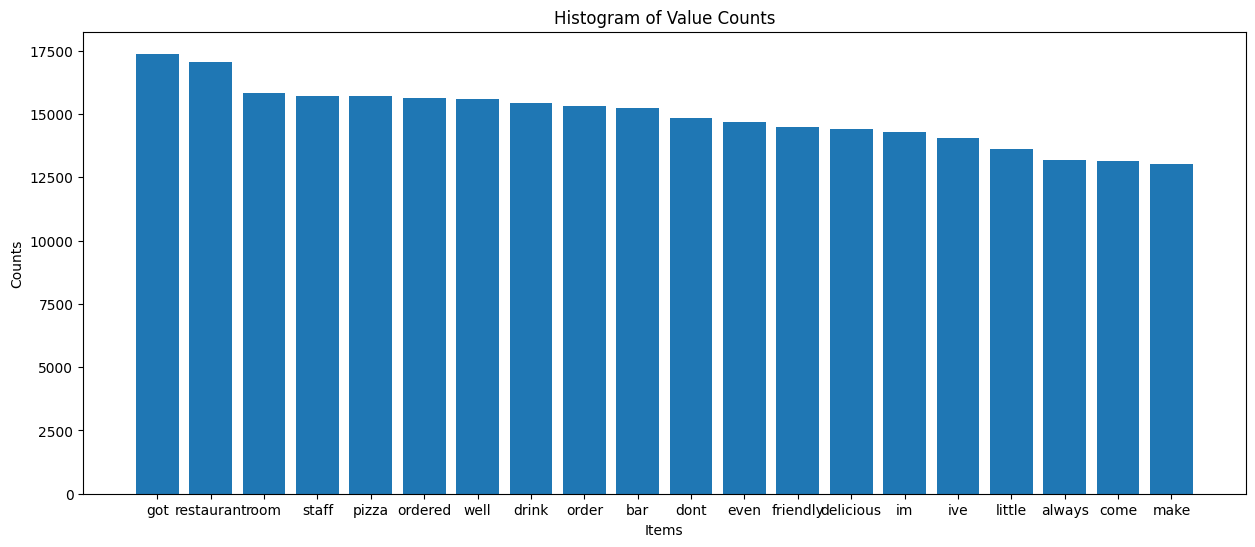

In [ ]:
from collections import Counter

all_words = ' '.join(df['preprocessed_text']).split()
word_freq = Counter(all_words)
most_common = word_freq.most_common(20)
words, counts = zip(*most_common)

plt.figure(figsize=(15, 6))
plt.bar(words, counts)
plt.xlabel('Items')
plt.ylabel('Counts')
plt.title('Histogram of Value Counts')
plt.show()



In [ ]:
coherence_scores = []
for num_topics in range(7, 20):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
    coherence_scores.append((num_topics, coherence_model.get_coherence()))

best_num_topics = max(coherence_scores, key=lambda x: x[1])[0]
print(f"Optimal number of topics: {best_num_topics}")

Optimal number of topics: 16


In [ ]:
ldamodel = LdaModel(corpus=corpus, num_topics=16, id2word=dictionary, alpha='auto', eta='auto')

In [ ]:
ldamodel.show_topics(num_topics=5)

[(15,
  '0.065*"nail" + 0.039*"salon" + 0.023*"massage" + 0.023*"color" + 0.022*"job" + 0.019*"done" + 0.018*"cut" + 0.017*"pedicure" + 0.017*"appointment" + 0.017*"manicure"'),
 (1,
  '0.064*"oyster" + 0.058*"shrimp" + 0.045*"new" + 0.039*"orleans" + 0.035*"seafood" + 0.029*"crab" + 0.022*"gumbo" + 0.020*"fried" + 0.019*"hour" + 0.017*"grit"'),
 (2,
  '0.024*"salad" + 0.014*"sandwich" + 0.014*"delicious" + 0.011*"fresh" + 0.011*"bread" + 0.010*"sauce" + 0.010*"cheese" + 0.009*"chicken" + 0.009*"dish" + 0.008*"ordered"'),
 (0,
  '0.019*"order" + 0.017*"minute" + 0.014*"came" + 0.013*"got" + 0.013*"table" + 0.012*"asked" + 0.012*"didnt" + 0.012*"said" + 0.011*"told" + 0.010*"took"'),
 (8,
  '0.012*"dont" + 0.009*"restaurant" + 0.009*"ive" + 0.008*"im" + 0.008*"better" + 0.008*"star" + 0.008*"much" + 0.007*"review" + 0.006*"thing" + 0.006*"even"')]

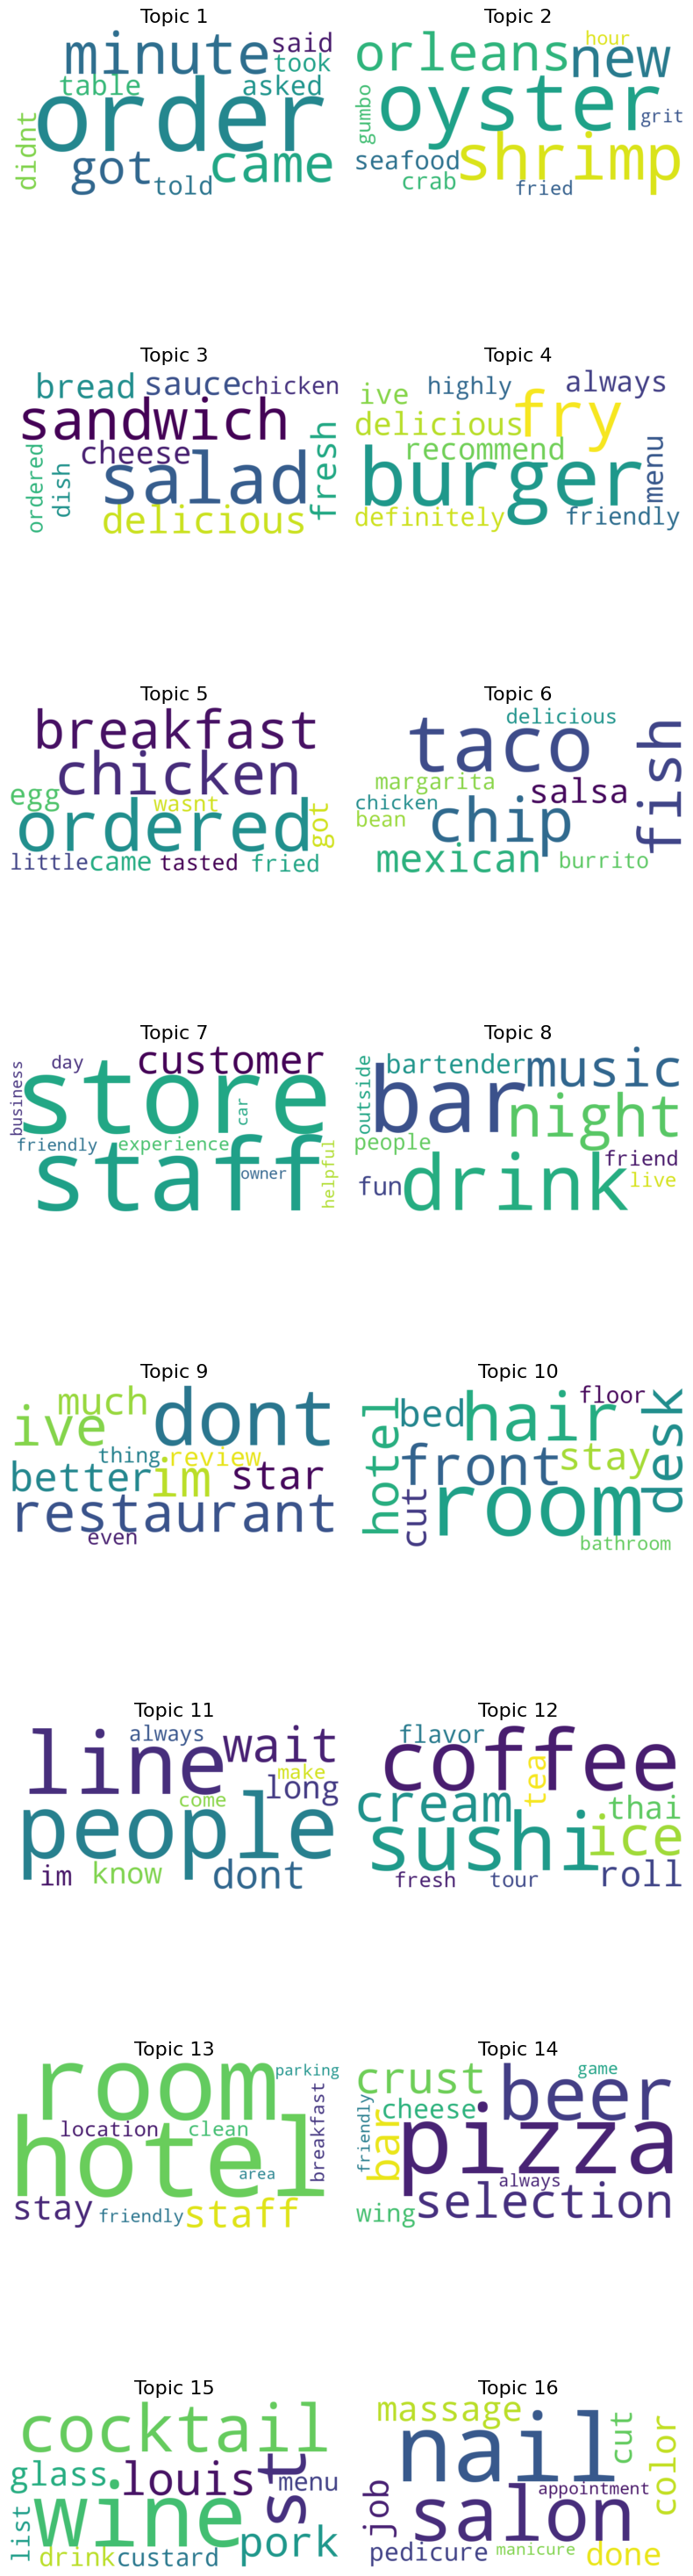

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

num_topics = 16
num_columns = 2
num_rows = math.ceil(num_topics / num_columns)


fig, axes = plt.subplots(num_rows, num_columns, figsize=(8, num_rows * 4), sharex=True, sharey=True)
axes = axes.flatten()


for i in range(num_topics):
    topic_words = dict(ldamodel.show_topic(i, 10))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i+1}", fontsize=16)

for j in range(num_topics, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
lda_coherence = CoherenceModel(topics=ldatopics[:10], texts=tokenized_text, dictionary=dictionary, window_size=10).get_coherence()
print(f"Topic coherence: {lda_coherence}")

Topic coherence: 0.5140037919691717


In [ ]:
lda_ppl = ldamodel.log_perplexity(corpus)
print(f"Topic perplexity: {lda_ppl}")

Topic perplexity: -8.990703502446994


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

ntexts = [' '.join(text) for text in tokenized_text]

vectorizer = TfidfVectorizer(
    max_features=None, stop_words="english"
)
vectorizer.fit(ntexts)


topics = [' '.join([t[0] for t in topic]) for topicid, topic in ldamodel.show_topics(formatted=False)]
topics = [vectorizer.transform([topic]).toarray() for topic in topics]
topics_matrix = np.concatenate(topics, axis=0)
similarities = cosine_similarity(topics_matrix)
topic_diversity = 1 - np.mean(similarities)
print(f"Topic Diversity: {topic_diversity}")

Topic Diversity: 0.8852786545698244


In [ ]:
doc_topic_distributions = [ldamodel.get_document_topics(doc) for doc in corpus]

In [ ]:
from collections import defaultdict

# Aggregate topic probabilities across all documents
topic_counts = defaultdict(float)
for doc_topics in doc_topic_distributions:
    for topic, prob in doc_topics:
        topic_counts[topic] += prob

# Normalize to get proportions
total_docs = len(corpus)
topic_proportions = {topic: count / total_docs for topic, count in topic_counts.items()}

# Print overall topic proportions
print("\nOverall Topic Distribution in Corpus:")
for topic, proportion in topic_proportions.items():
    print(f"  Topic {topic}: {proportion:.4f}")


Overall Topic Distribution in Corpus:
  Topic 2: 0.0864
  Topic 11: 0.0613
  Topic 13: 0.0487
  Topic 14: 0.0276
  Topic 0: 0.0957
  Topic 6: 0.0505
  Topic 7: 0.0795
  Topic 8: 0.1527
  Topic 1: 0.0164
  Topic 3: 0.0787
  Topic 4: 0.0716
  Topic 5: 0.0508
  Topic 10: 0.0448
  Topic 12: 0.0620
  Topic 9: 0.0268
  Topic 15: 0.0111


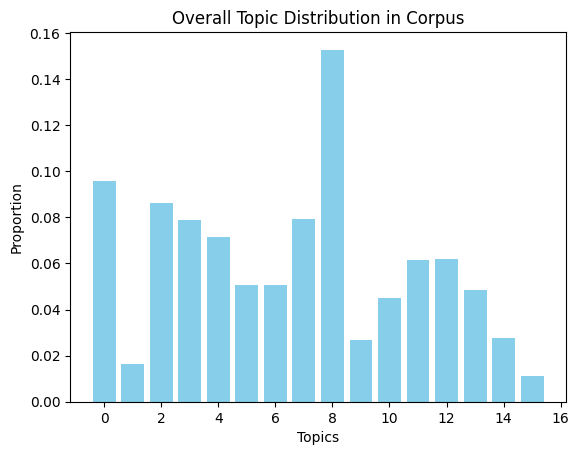

In [ ]:
import matplotlib.pyplot as plt

topics = list(topic_proportions.keys())
proportions = list(topic_proportions.values())

plt.bar(topics, proportions, color='skyblue')
plt.xlabel("Topics")
plt.ylabel("Proportion")
plt.title("Overall Topic Distribution in Corpus")
plt.show()